# Cdiscount retail Analysis

![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

# Presented by

##           Steve CHEMI NGOULOU

### Introduction

The aim of this project is to extract insigths from the data, an online retail company. 
We will analyze sales history data and identify key points that made the business profitable or not. These key points should be clear enough to help designing a new sales profitability strategy for the next year by the marketing director of A-to-Z-Market.

# Analysis preparation

## Loading packages

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

#import librairie for map chart
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

## Load the Sales Data

In [2]:
sales = pd.read_csv("sales.csv")

# Data Exploration

## Glimps the Data

We look at the dataframe, the data shape, we look to few rows of the data and check for missing data

In [4]:
print(f"Rows: {sales.shape[0]}, Columns: {sales.shape[1]}")

Rows: 9994, Columns: 22


The DataFrame has 9994 rows and 22 Columns

Now Lets have a first view of our Dataframe, we can see the different variables with their vamues for the first 5 elements

In [5]:
sales.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


For a better understanding, let's have the type of each variable in the dataframe

In [6]:
for column in sales.columns:
    print(f"{column}:{sales[column].dtype}")

Order ID:object
Order Date:object
Order Year:int64
Order Quarter:int64
Ship Date:object
Ship Mode:object
Customer ID:object
Customer Name:object
Segment:object
Country:object
City:object
State:object
Postal Code:float64
Region:object
Product ID:object
Category:object
Sub-Category:object
Product Name:object
Sales:float64
Quantity:int64
Discount:float64
Profit:float64


C:\Users\steve\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\steve\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



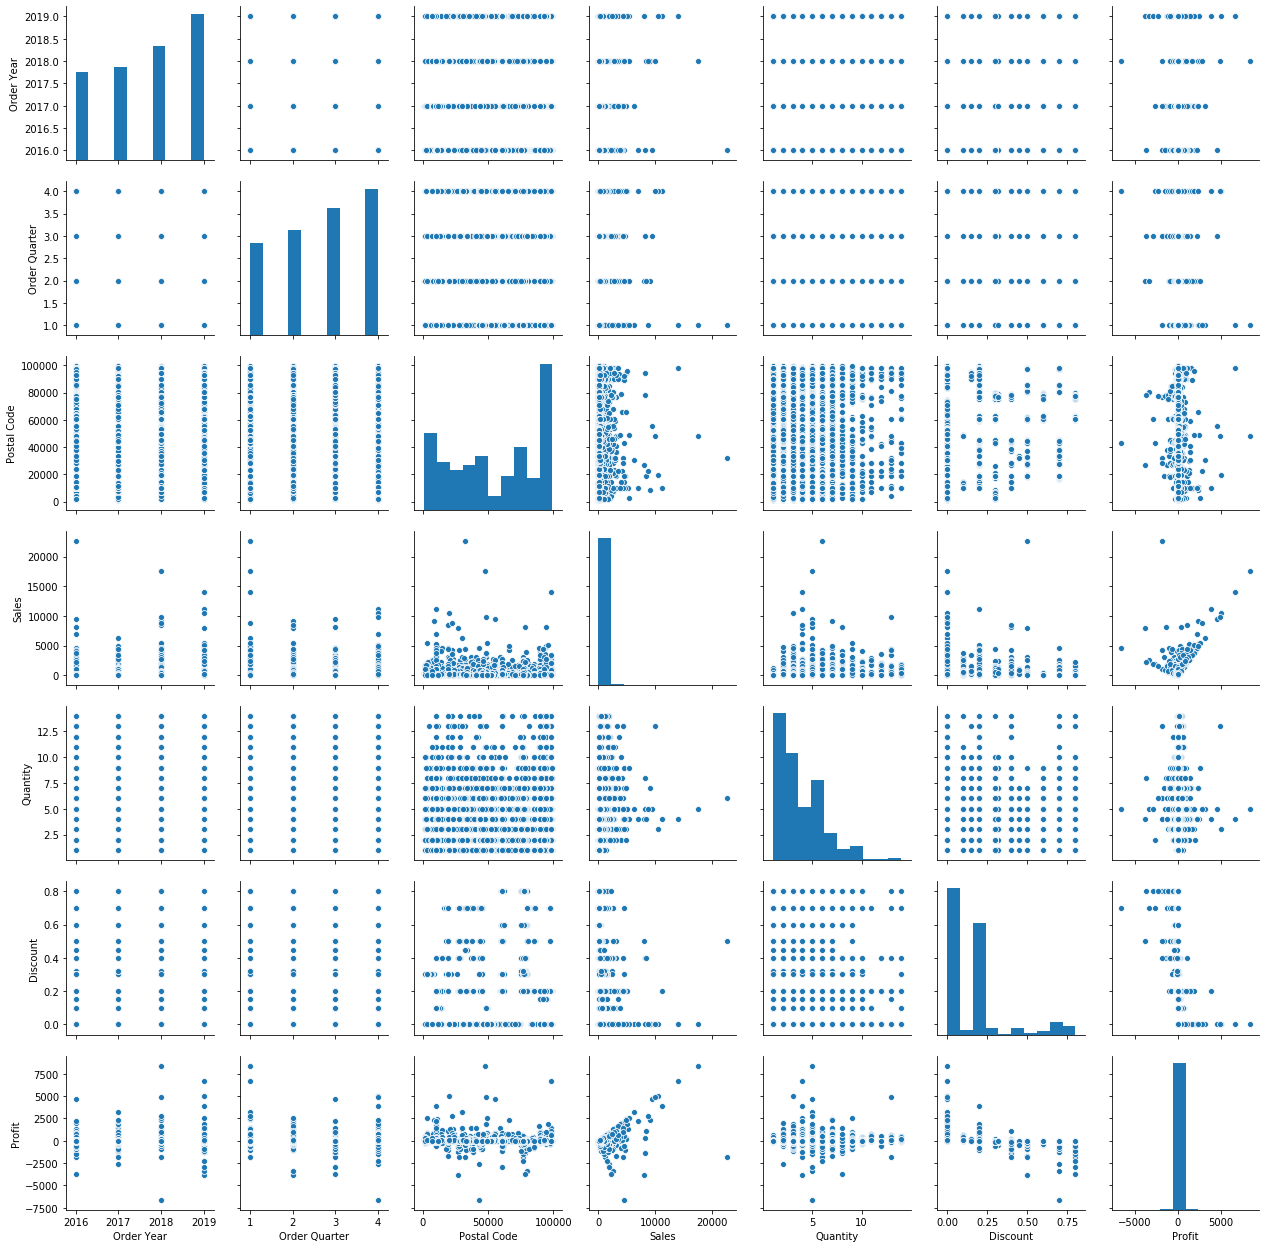

In [7]:
sns.pairplot(sales)

From this pair plot, we can start looking to trends between some variables. But, this is limited since we have 22 columns and all of them can not be seen. Lets show the correlation between the variables.

In [5]:
#correlation
correlation = sales.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [8]:
sales.corr()

,Order Year,Order Quarter,Postal Code,Sales,Quantity,Discount,Profit
Order Year,1.000000,-0.046618,0.005146,-0.009679,-0.005810,-0.002662,0.004670
Order Quarter,-0.046618,1.000000,0.027267,-0.011558,0.010873,-0.003356,-0.017598
Postal Code,0.005146,0.027267,1.000000,-0.022346,0.013376,0.057243,-0.028751
Sales,-0.009679,-0.011558,-0.022346,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.005810,0.010873,0.013376,0.200795,1.000000,0.008623,0.066253
Discount,-0.002662,-0.003356,0.057243,-0.028190,0.008623,1.000000,-0.219487
Profit,0.004670,-0.017598,-0.028751,0.479064,0.066253,-0.219487,1.000000


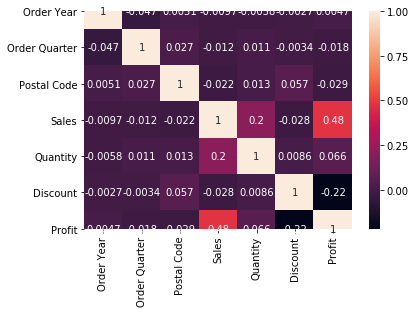

In [10]:
sns.heatmap(sales.corr(), annot=True)

There is the heat map showing the level of correlation between variables. We can appreciate it by looking at the legend at the right.
For example, we 

Now some additional informations about the dataframe

In [6]:
sales.info

<bound method DataFrame.info of             Order ID  Order Date  Order Year  Order Quarter   Ship Date  \
0     CA-2018-152156  08/11/2018        2018              3  11/11/2018   
1     CA-2018-152156  08/11/2018        2018              3  11/11/2018   
2     CA-2018-138688  12/06/2018        2018              4  16/06/2018   
3     US-2017-108966  11/10/2017        2017              4  18/10/2017   
4     US-2017-108966  11/10/2017        2017              4  18/10/2017   
...              ...         ...         ...            ...         ...   
9989  CA-2016-110422  21/01/2016        2016              1  23/01/2016   
9990  CA-2019-121258  26/02/2019        2019              1  03/03/2019   
9991  CA-2019-121258  26/02/2019        2019              1  03/03/2019   
9992  CA-2019-121258  26/02/2019        2019              1  03/03/2019   
9993  CA-2019-119914  04/05/2019        2019              2  09/05/2019   

           Ship Mode Customer ID     Customer Name    Segment      

## Processing the Data (Cleaning and organising)

### Let's convert into time object time all the time variables

In [7]:
sales['O_Date'] = pd.to_datetime(sales['Order Date'])

In [8]:
sales['S_Date'] = pd.to_datetime(sales['Ship Date'])

### Result

In [9]:
sales.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,O_Date,S_Date
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2018-08-11,2018-11-11
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2018-08-11,2018-11-11
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2018-12-06,2018-06-16
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2017-11-10,2017-10-18
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2017-11-10,2017-10-18


### Let's find all missing data in order to decide how to deal with

In [10]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [11]:
missing_data(sales)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,O_Date,S_Date
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,object,int64,int64,object,object,object,object,object,object,...,object,object,object,object,float64,int64,float64,float64,datetime64[ns],datetime64[ns]


As we can see here this dataframe is relatively clean and good, just missing 11 Postal Codes, about 11%
This is not as important because we still have the data from the towns so we can deal with this without missing relevant informations.

### Lets group variables, numerical ones and object ones

In [12]:
print(sales.dtypes[sales.dtypes == "object"].index)
#print('Number of categorical features is:',sales.dtypes[sales.dtypes == "object"].count())
print('\n'*3)
#numerical
print(sales.dtypes[sales.dtypes != "object"].index, '\n\n')
print('Number of numerical variacles:',sales.dtypes[sales.dtypes != "object"].count(),'Number of categorical variables:',sales.dtypes[sales.dtypes == "object"].count())

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')




Index(['Order Year', 'Order Quarter', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit', 'O_Date', 'S_Date'],
      dtype='object') 


Number of numerical variacles: 9 Number of categorical variables: 15


### Some Statistical description of our numerical variables

In [13]:
sales[['Order Year', 'Order Quarter', 'Postal Code', 'Sales', 'Quantity','Discount', 'Profit']].describe()

,Order Year,Order Quarter,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2017.722233,2.694617,55245.233297,229.858001,3.789574,0.156203,28.656896
std,1.123555,1.107635,32038.715955,623.245101,2.225110,0.206452,234.260108
min,2016.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2017.000000,2.000000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2018.000000,3.000000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,2019.000000,4.000000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2019.000000,4.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Insight

### Grouping cities by sales

In [14]:
By_City=sales.groupby(['City'])

In [15]:
By_City['Sales'].count().sort_values(ascending=False).reset_index()

,City,Sales
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Danbury,1
527,Orland Park,1
528,Davis,1
529,Ontario,1


### Plotting the Top 20 Cities

#### By Sales

<Figure size 1440x720 with 0 Axes>

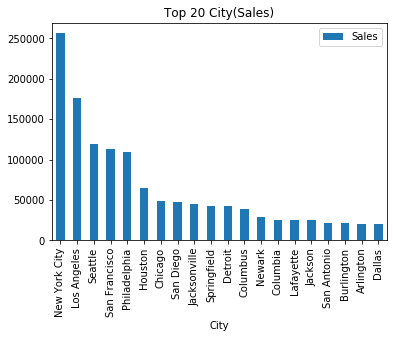

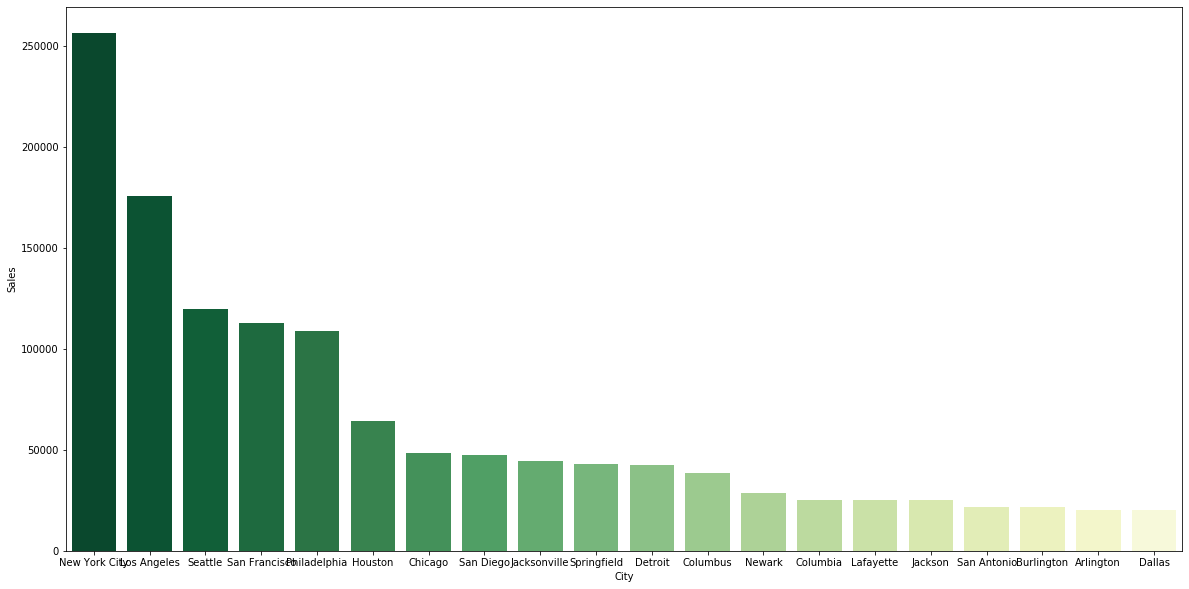

In [16]:
plt.figure(figsize=(20,10))
Top_20=By_City['Sales'].sum().sort_values(ascending=False).reset_index().head(20)
Top_20.plot(x='City',kind='bar',title='Top 20 City(Sales)')
plt.figure(figsize=(20,10))
sns.barplot(data=Top_20,x='City',y='Sales',ci=None, palette='YlGn_r')

In [17]:
codes= {'Kentucky':'KY', 'California':'CA', 'Florida':'FL', 'North Carolina':'NC','Washington':'WA', 'Texas':'TX', 'Wisconsin':'WI', 'Utah':'UT', 'Nebraska':'NE','Pennsylvania':'PA', 'Illinois':'IL', 'Minnesota':'MN', 'Michigan':'MI', 'Delaware':'DE','Indiana':'IN', 'New York':'NY', 'Arizona':'AZ', 'Virginia':'VA', 'Tennessee':'TN','Alabama':'AL', 'South Carolina':'SC', 'Oregon':'OR', 'Colorado':'CO', 'Iowa':'IA', 'Ohio':'OH',
       'Missouri':'MO', 'Oklahoma':'OK', 'New Mexico':'NM', 'Louisiana':'LA', 'Connecticut':'CT', 'New Jersey':'NJ', 'Massachusetts':'MA', 'Georgia':'GA', 'Nevada':'NV', 'Rhode Island':'RI',
       'Mississippi':'MS', 'Arkansas':'AR', 'Montana':'MT', 'New Hampshire':'NH', 'Maryland':'MD',
       'District of Columbia':'DC', 'Kansas':'KS', 'Vermont':'VT', 'Maine':'ME',
       'South Dakota':'SD', 'Idaho':'ID', 'North Dakota':'ND', 'Wyoming':'WY',
       'West Virginia':'WV'} 
#we creat a new feature 'code'
sales['code']=sales['State'].map(codes)
#we group by profit
temp=sales.groupby('code')['Sales'].sum().sort_values(ascending=False).reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=temp['code'],
    z=temp['Sales'],
    locationmode='USA-states',
    colorscale='ylgn',
    autocolorscale=False,
    #text=temp['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Sales"
))

fig.update_layout(
    title_text='Sales per State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, 
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

We can see how this is represented in the map,this reduces the time of insight.

#### By Profit

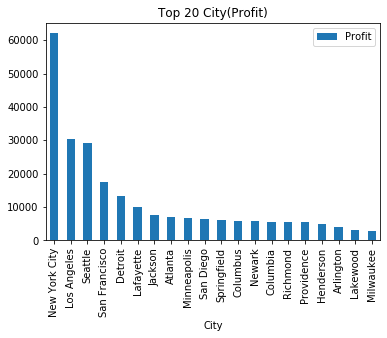

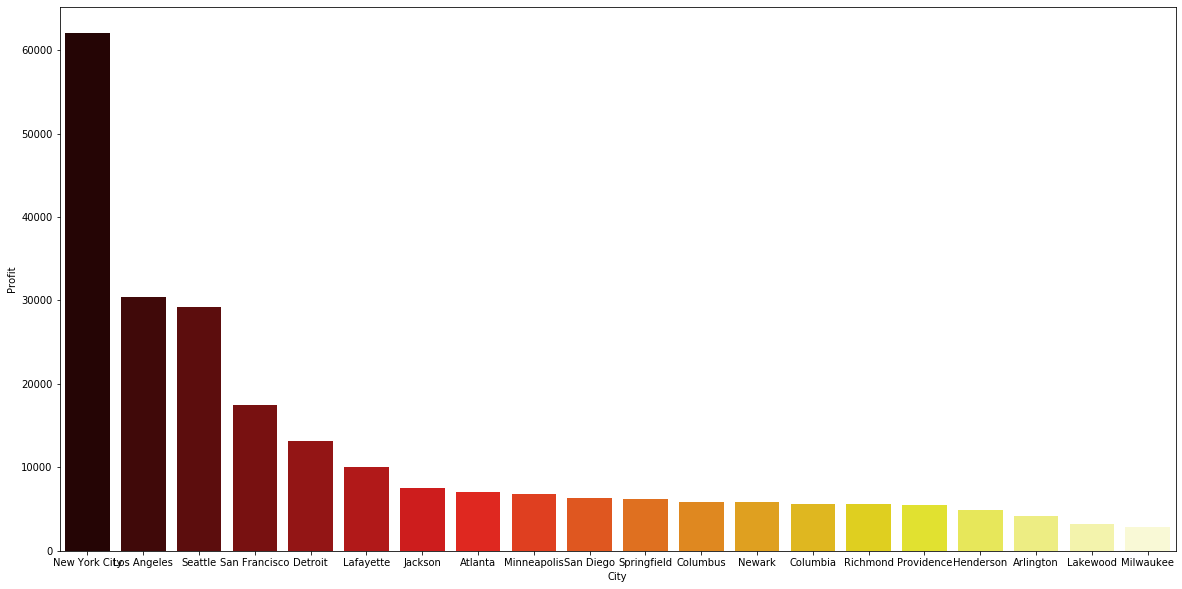

In [18]:

Top_20=By_City['Profit'].sum().sort_values(ascending=False).reset_index().head(20)
Top_20.plot(x='City',kind='bar',title='Top 20 City(Profit)')
plt.figure(figsize=(20,10))
sns.barplot(data=Top_20,x='City',y='Profit',ci=None, palette='hot')

In [19]:
codes= {'Kentucky':'KY', 'California':'CA', 'Florida':'FL', 'North Carolina':'NC','Washington':'WA', 'Texas':'TX', 'Wisconsin':'WI', 'Utah':'UT', 'Nebraska':'NE','Pennsylvania':'PA', 'Illinois':'IL', 'Minnesota':'MN', 'Michigan':'MI', 'Delaware':'DE','Indiana':'IN', 'New York':'NY', 'Arizona':'AZ', 'Virginia':'VA', 'Tennessee':'TN','Alabama':'AL', 'South Carolina':'SC', 'Oregon':'OR', 'Colorado':'CO', 'Iowa':'IA', 'Ohio':'OH',
       'Missouri':'MO', 'Oklahoma':'OK', 'New Mexico':'NM', 'Louisiana':'LA', 'Connecticut':'CT', 'New Jersey':'NJ', 'Massachusetts':'MA', 'Georgia':'GA', 'Nevada':'NV', 'Rhode Island':'RI',
       'Mississippi':'MS', 'Arkansas':'AR', 'Montana':'MT', 'New Hampshire':'NH', 'Maryland':'MD',
       'District of Columbia':'DC', 'Kansas':'KS', 'Vermont':'VT', 'Maine':'ME',
       'South Dakota':'SD', 'Idaho':'ID', 'North Dakota':'ND', 'Wyoming':'WY',
       'West Virginia':'WV'} 
#we creat a new feature 'code'
sales['code']=sales['State'].map(codes)
#we group by profit
temp=sales.groupby('code')['Profit'].sum().sort_values(ascending=False).reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=temp['code'],
    z=temp['Profit'],
    locationmode='USA-states',
    colorscale='reds',
    autocolorscale=False,
    #text=temp['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Profit"
))

fig.update_layout(
    title_text='Profit per State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, 
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

### Cities with the highest discoiunt rates on products

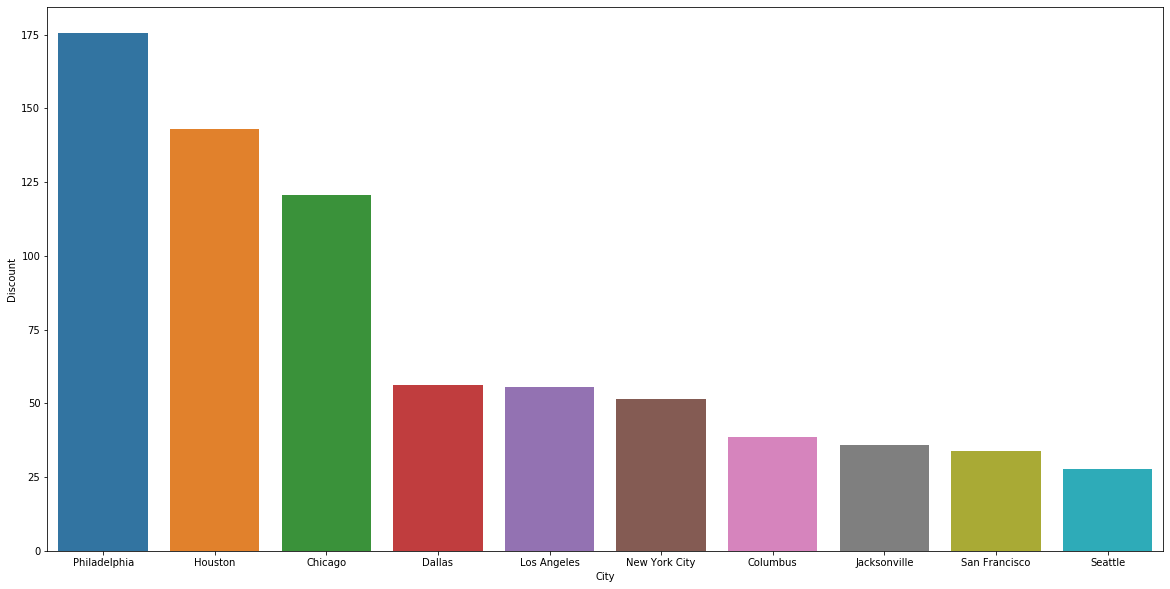

In [20]:

Top_20=By_City['Discount'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(20,10))
sns.barplot(data=Top_20,x='City',y='Discount',ci=None)

We notice that the cities here are not the most profitables

### Let's classify the products by sales

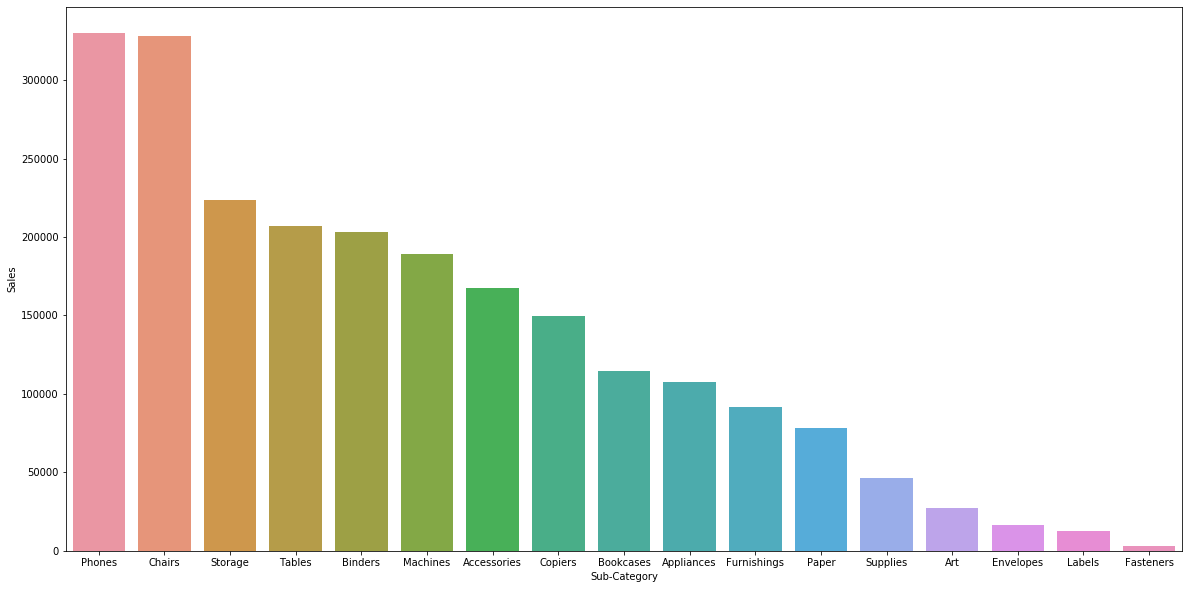

In [21]:
by_subcategory=sales.groupby('Sub-Category')
Sales_per_sub=by_subcategory['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=Sales_per_sub,x='Sub-Category',y='Sales',ci=None)

### Now let's compare with the sames sub_categories but ranked by Profit

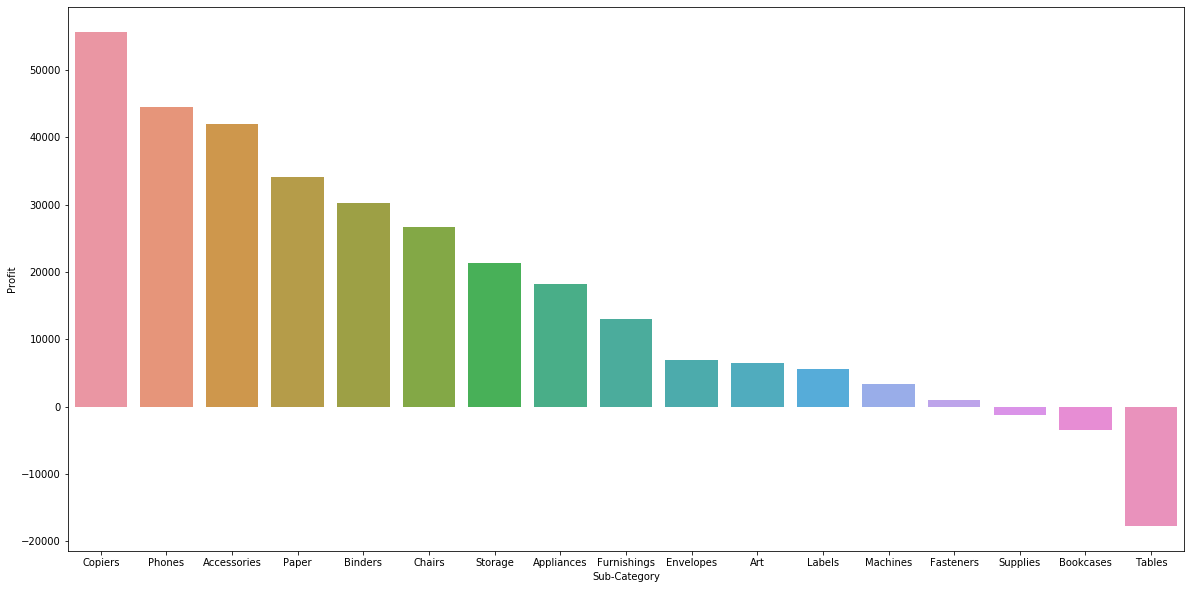

In [22]:
by_subcategory=sales.groupby('Sub-Category')
profit_per_sub=by_subcategory['Profit'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=profit_per_sub,x='Sub-Category',y='Profit',ci=None)

We Can see that Copiers are more profitable than any other product While the most sent products are phones.

More important, We noticed that office supplies, Bookcases and tables have negtive profits, tables are the worth!
In orther to increase the profit, the company have to deal with those tables. Lets look deeper into this by showing the discounts on each products

### Products Sub_categories per Discount rate

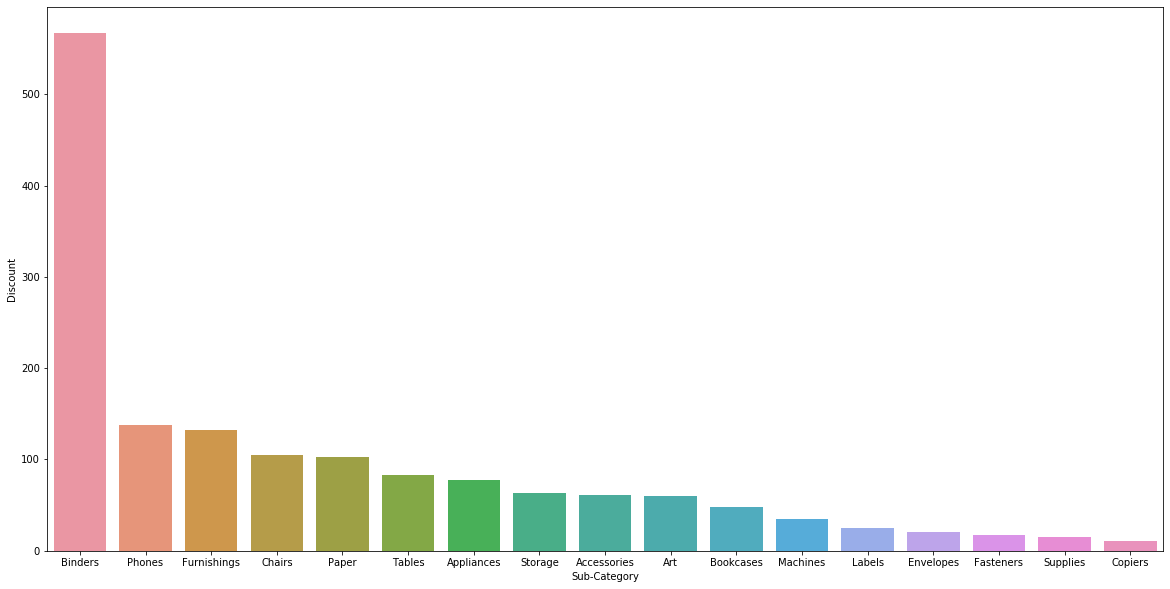

In [23]:
by_subcategory=sales.groupby('Sub-Category')
Discount_per_sub=by_subcategory['Discount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=Discount_per_sub,x='Sub-Category',y='Discount',ci=None)

Now we understand it more, ables are having great discounts but negative profits. Our recommendation is to Stop discounting them or stop selling them.

### Now lets see the less profitable cities

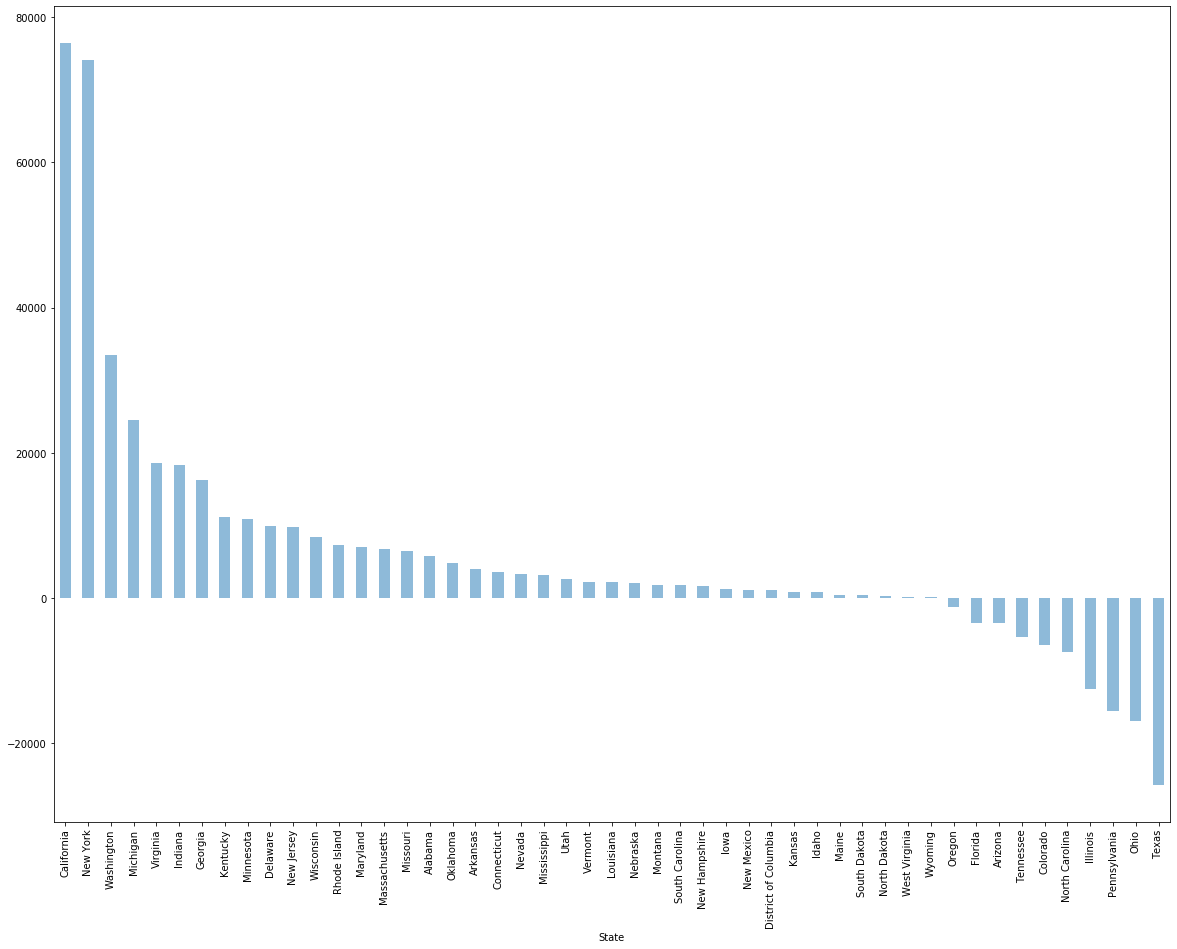

In [24]:

plt.figure(figsize=(20,15))
group_by_state = sales['Profit'].groupby(sales['State'])
group_by_state.sum().sort_values(ascending = False).plot.bar(alpha = .5)



We can see that Pennsylvania, Illinois, Tenesse and some other states are having negative profit, bad! Let's try to insight why

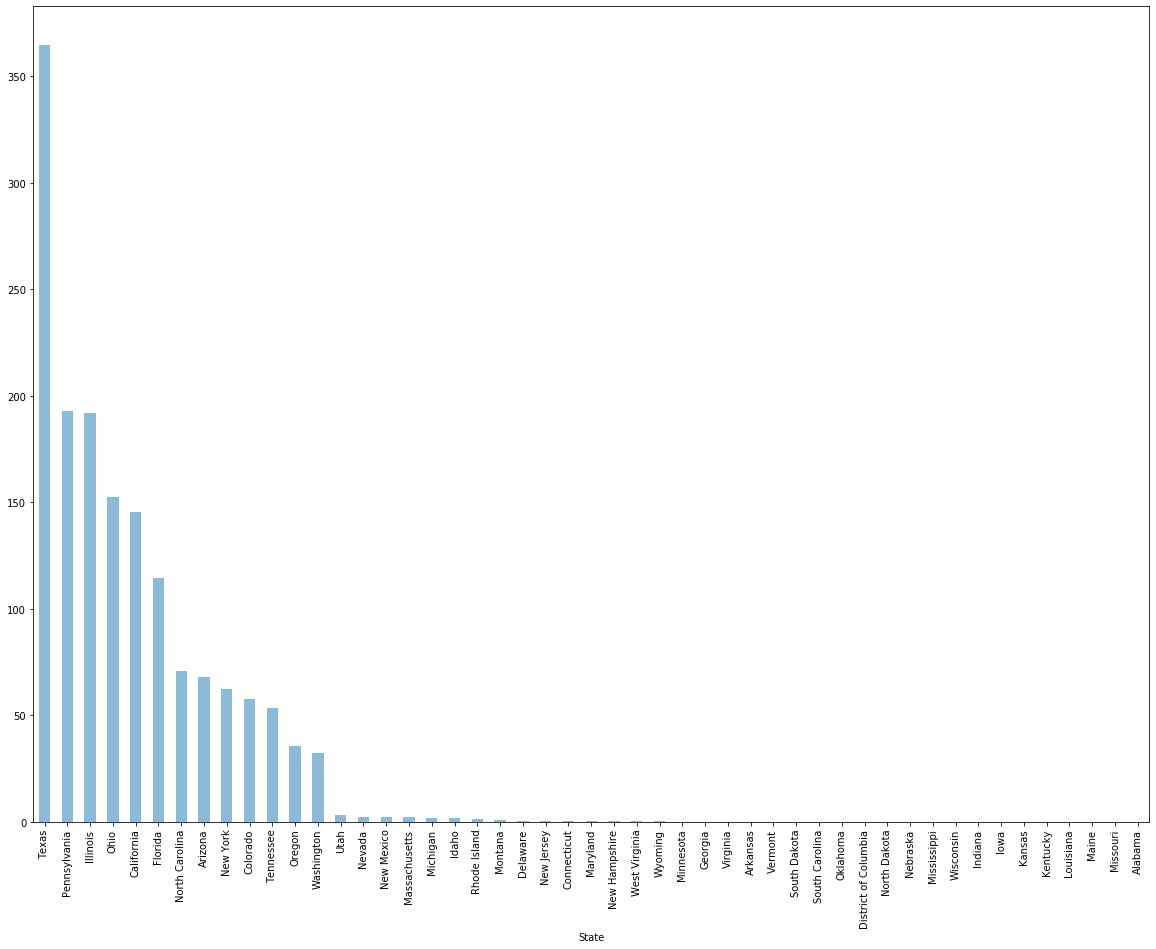

In [25]:

plt.figure(figsize=(20,15))
group_by_state = sales['Discount'].groupby(sales['State'])
group_by_state.sum().sort_values(ascending = False).plot.bar(alpha = .5)



As we can see on this map, it seems like all those cities with negative profits have a huge discount rate. Our advise is to moderate it and try to balance them with the profit.

## Conclusion and perspectives

Finally, we saw that the profitability of Some products are not directly linked to their sales.
Secondly, in orther to increase their sales in some cities, Cdiscount offers them huge discounts and this have a very bad effect on the profitability of the company. the challenge is to find a good point on which sales and profit can be balanced.
Also, Some products are sold with negative profits, the company have to deal with: they can either Stop discountig, stop selling or change the product materials or the suppliers in orther to reduce their price.

Perspectives: We will try to make the Seasonality analysis of the market shares and try to plot a visible map with shades of colors representing all those measures in orther to present them better, because we think tha with a good visibility, the time to insight goes down